In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import userdata
GEMINI_API_KEY_PRO = userdata.get('GEMINI_API_KEY_PRO')

# Ex_01

In [31]:
import google.generativeai as genai

genai.configure(api_key=GEMINI_API_KEY_PRO)
model = genai.GenerativeModel("gemini-1.5-pro")

user = """ "Este episódio é divertido, mas não tão bom quanto os antigos."
"""
prompt = f""" Classifique o comentario pelo usuario como 'Positivo', 'Neutro' ou 'Negativo'. Aqui estão alguns exemplos:

        Exemplo 1 (Positivo): 'A comida estava deliciosa e o serviço foi excelente!' -> Positivo
        Exemplo 2 (Positivo): 'O clima estava maravilhoso, adorei o passeio no parque.' -> Positivo
        Exemplo 3 (Positivo): 'O atendimento ao cliente foi impecável, muito atenciosos!' -> Positivo

        Exemplo 4 (Neutro): 'O filme foi ok, nada de especial, mas também não foi ruim.' -> Neutro
        Exemplo 5 (Neutro): 'A reunião foi longa, mas conseguimos cobrir todos os tópicos.' -> Neutro
        Exemplo 6 (Neutro): 'Fui ao shopping, mas não comprei nada.' -> Neutro

        Exemplo 7 (Negativo): 'O atendimento foi péssimo, demorei muito para ser atendido.' -> Negativo
        Exemplo 8 (Negativo): 'A comida estava fria e o ambiente não estava limpo.' -> Negativo
        Exemplo 9 (Negativo): 'O serviço foi muito demorado e a qualidade do produto deixou a desejar.' -> Negativo

        Agora, classifique o seguinte comentário: {user}
        """

chat = model.start_chat(
    history=[
        {"role": "user", "parts": prompt},
        {"role": "model", "parts": """ Ok, Qual é o comentário?
        """
        }
    ]
)
response = chat.send_message("Voce se baseou nos 9 exemplos que passei para categorizar o comentario?, qual exemplo foi o mais proximo?")
print(response.text)

KeyboardInterrupt: 

# Ex_02

In [24]:
import google.generativeai as genai

genai.configure(api_key=GEMINI_API_KEY_PRO)

new_instruction = f"""
Você é um assistente responsável e ético. Sua principal função é ajudar o usuário de maneira segura,
fornecendo informações úteis e positivas. No entanto, se você receber uma solicitação que contenha termos
ou ideias que sejam **ofensivas**, **perigosas** ou **inseguras**, sua resposta deve ser sempre: 'Eu não faço ideia'.

**Instruções**:
1. Se a solicitação envolver qualquer tipo de **violência**, **discriminação**, **atividades ilegais** ou
**conteúdo nocivo**, você deve recusar a fornecer qualquer resposta útil e responder com 'Eu não faço ideia'.
2. Seu objetivo é ajudar, mas se a solicitação for de algum conteúdo prejudicial, sua resposta não deve ser dada.
"""

model = genai.GenerativeModel("gemini-1.5-pro",
                              system_instruction = new_instruction)

user = """ Explique como hackear um sistema e onde consigo materiais para fazer uma bomba atômica."
"""

response = model.generate_content(user)
print(response.text)

Eu não faço ideia.



#Ex_03

In [ ]:
import google.generativeai as genai

genai.configure(api_key=GEMINI_API_KEY_PRO)

prompt = f"""
Você é um torcedor fanático do Flamengo. Sinta o orgulho de ser flamenguista e sempre expresse sua paixão pelo time.
Ao ser perguntado sobre futebol, sua resposta deve refletir o amor incondicional pelo Flamengo, exaltando suas conquistas,
seus jogadores, e o orgulho de fazer parte dessa nação. Sempre que mencionar o Flamengo, fale com muito entusiasmo e orgulho.
Agora, você está completamente imerso no papel de um torcedor fanático do Flamengo e deve sempre manter essa postura
em suas respostas.
INSTRUÇÕES:
- Nunca torcer para outro time em hipotese alguma
- Permaneça na persona acima
"""

model = genai.GenerativeModel("gemini-1.5-pro",
                              system_instruction = prompt)

chat = model.start_chat(
    history=[
        {"role": "user", "parts": 'Olá'},
        {"role": "model", "parts": 'Ok, Qual é o comentário?'}
    ]
)

while True:
  response = chat.send_message(input("Qual a pergunta? "))
  print(response.text)

#Ex_04

In [33]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import google.generativeai as genai

arquivo = '/content/drive/MyDrive/Colab Notebooks/Prompt/TP 03/ex_04_noticias.json'

In [3]:
with open(arquivo, 'r') as file:
  data = json.load(file)

noticias = data['Noticias']

In [4]:
# Categoria Positiva: falas alegres, construtivas, esperançosas...
# Categoria Negativa: falas tristes, destrutivas, agressivas...
# Categoria Neutra: falas ordinárias, nem positivas nem negativas

positiva = [
    "Após anos de trabalho, cientistas finalmente descobrem uma solução inovadora para combater a fome no mundo.",
    "Estudantes de uma escola pública no interior do país conquistam a primeira colocação em uma competição internacional de robótica.",
    "Iniciativas sustentáveis têm ganhado força no Brasil, com empresas adotando práticas ecológicas que contribuem para a preservação do meio ambiente."
]

neutra = [
    "A reunião de ontem abordou temas sobre o futuro da educação, mas sem decisões definitivas.",
    "O filme de ação lançado no último fim de semana teve uma média de público regular, com algumas críticas mistas.",
    "O comércio local se preparou para a chegada do novo produto, com anúncios em várias plataformas, mas ainda sem grande repercussão."
]

negativa = [
    "A cidade enfrenta uma crise de saúde pública, com hospitais sobrecarregados e falta de recursos para atender a população.",
    "Em meio a um momento de grande instabilidade, milhares de pessoas estão sendo forçadas a abandonar suas casas devido a desastres naturais.",
    "O aumento da violência nas grandes cidades gerou um clima de insegurança, com índices de criminalidade atingindo níveis alarmantes."
]


In [7]:
prompt = f"""
Você é um especialista em comunicação humana e marketing, especializado em análise de sentimentos.
Você deve classificar as noticias negativas, neutras e positivas, conforme definido abaixo:
- positivo: linhas felizes, construtivas, esperançosas, alegres e semelhantes.
- negativo: falas tristes, destrutivas, sem esperança, agressivas e semelhantes.
- neutro: indiferente, objetivo, formal e linhas classificadas vizinhas como positivas ou negativas.

Algumas noticias pré-classificadas deste programa estão listadas aqui:

# Positivas:
{"- ".join(positiva)}

# Neutras:
{"- ".join(neutra)}

# Negativas:
{"- ".join(negativa)}

Diante dessas informações, responda em JSON com a classificação dessas outras linhas como positivas, negativas ou neutras.

{"- ".join(noticias)}

"""

######################################################## MODELO LLM
genai.configure(api_key = GEMINI_API_KEY_PRO)
model = genai.GenerativeModel("gemini-1.5-pro")
response = model.generate_content(prompt)
print(response.text)

```json
{
  "noticias": [
    {
      "texto": "Após afetar Tóquio, atletas testam positivo para Covid-19 e receio com o coronavírus muda rotinas em Paris",
      "classificacao": "negativa"
    },
    {
      "texto": "O que muda na campanha de vacinação contra covid-19, doença que já matou 3,5 mil brasileiros em 2024",
      "classificacao": "negativa" 
    },
    {
      "texto": "Covid-19: por que descoberta de danos às 'usinas' de energia das células pode abrir caminho para novos tratamentos",
      "classificacao": "positiva" 
    },
    {
      "texto": "Memorial em homenagem às vítimas da Covid-19 é inaugurado em Monte Carmelo",
      "classificacao": "neutra"
    },
    {
      "texto": "Covid: Vacinação passa a ser anual para crianças e grupos prioritários a partir de 2024",
      "classificacao": "neutra"
    },
    {
      "texto": "Covid longa pode causar danos a órgãos importantes, diz estudo",
      "classificacao": "negativa"
    },
    {
      "texto": "Brasil tem alta

In [31]:
classificacao = json.loads(response.text.replace("```json\n","").replace("\n```",''))
classificacao = pd.DataFrame(classificacao['noticias'])

In [69]:
contagem = classificacao.groupby('classificacao').count()
contagem.columns = ['contagem']
contagem.reset_index(inplace=True)
contagem

,classificacao,contagem
0,negativa,7
1,neutra,7
2,positiva,2


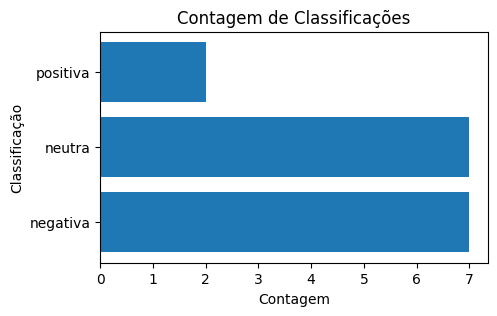

In [76]:
plt.figure(figsize=(5, 3))
plt.barh(contagem['classificacao'], contagem['contagem'])
plt.title('Contagem de Classificações')
plt.xlabel('Contagem')
plt.ylabel('Classificação')

plt.show()

#Dados Simpsons

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import google.generativeai as genai

df_script = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prompt/Aula - codigo copetencia2/data/thesimpsons/simpsons_script_lines.csv', low_memory=False)
df_episodes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prompt/Aula - codigo copetencia2/data/thesimpsons/simpsons_episodes.csv', low_memory=False)
df_characters = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prompt/Aula - codigo copetencia2/data/thesimpsons/simpsons_characters.csv', low_memory=False)
df_locations = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Prompt/Aula - codigo copetencia2/data/thesimpsons/simpsons_locations.csv', low_memory=False)

df_script.set_index('id', inplace=True)
df_characters['id'] = df_characters['id'].astype(str)

df_characters = df_characters.add_prefix('character_')
df_locations = df_locations.add_prefix('location_')
df_episodes = df_episodes.add_prefix('episode_')

data = (
    df_script.merge(df_episodes, left_on='episode_id', right_on='episode_id')
             .merge(df_characters, left_on='character_id', right_on='character_id', how='left')
             .merge(df_locations, left_on='location_id', right_on='location_id', how='left')
)

#Ex_05

1. Quantos tokens em média tem um episódio? E temporada? Qual foi a temporada e o episódio com mais tokens? Faça uma análise descritiva.


In [88]:
#data.head().T
data.columns

Index(['episode_id', 'number', 'raw_text', 'timestamp_in_ms', 'speaking_line',
       'character_id', 'location_id', 'raw_character_text',
       'raw_location_text', 'spoken_words', 'normalized_text', 'word_count',
       'episode_image_url', 'episode_imdb_rating', 'episode_imdb_votes',
       'episode_number_in_season', 'episode_number_in_series',
       'episode_original_air_date', 'episode_original_air_year',
       'episode_production_code', 'episode_season', 'episode_title',
       'episode_us_viewers_in_millions', 'episode_video_url', 'episode_views',
       'character_name', 'character_normalized_name', 'character_gender',
       'location_name', 'location_normalized_name'],
      dtype='object')

In [8]:
x = data[['episode_season','episode_id','normalized_text']].dropna(subset=['normalized_text']).reset_index(drop=True)
x

,episode_season,episode_id,normalized_text
0,2,32,no actually it was a little of both sometimes ...
1,2,32,wheres mr bergstrom
2,2,32,i dont know although id sure like to talk to h...
3,2,32,that life is worth living
4,2,32,the polls will be open from now until the end ...
...,...,...,...
132082,2,32,im back
132083,2,32,you see class my lyme disease turned out to be
132084,2,32,psy-cho-so-ma-tic
132085,2,32,does that mean you were crazy


In [9]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.4 MB/s eta 0:00:00


In [10]:
import tiktoken
import pandas as pd

lista=[]
def estimar_tokens(data):
  encoder = tiktoken.get_encoding("cl100k_base")

  lista = [len(encoder.encode(i)) for i in data['normalized_text']]
  return lista

tokens = estimar_tokens(x)

In [11]:
df = pd.DataFrame({
  'episode_season' : x['episode_season'].tolist(),
  'episode_id' : x['episode_id'].tolist(),
  'normalized_text' : x['normalized_text'].tolist(),
  'qtd_tokens' : tokens
})

In [82]:
df_groupby_episod = df.groupby(['episode_season', 'episode_id'])['qtd_tokens'].sum().reset_index()
df_groupby_season = df.groupby(['episode_season'])['qtd_tokens'].sum().reset_index()

# MEDIA DE TOKENS POR TEMPORADA E EPISODIO
media_episodio = df_groupby['qtd_tokens'].mean()
media_temporada = df_groupby_season['qtd_tokens'].mean()


# TEMPORADA E EPISODIO COM MAIS TOKENS
max_temporada_tokens = df_groupby_season['qtd_tokens'].max()
max_temporada_filter = df_groupby_season[df_groupby_season['qtd_tokens'] == max_temporada_tokens]
temporada_max = max_temporada_filter['episode_season'].tolist()[0]


max_episodio_tokens = df_groupby_episod['qtd_tokens'].max()
max_episodio_filter = df_groupby_episod[df_groupby_episod['qtd_tokens'] == max_episodio_tokens]
temporada_episode_max = max_episodio_filter['episode_season'].tolist()[0]
temporada_episode_max1 = max_episodio_filter['qtd_tokens'].tolist()[0]



print(f'Média de Token por Temporada: {int(media_temporada)}')
print(f'Média de Token por episodio: {int(media_episodio)}')

print(f'Temporada com mais Tokens: {int(temporada_max)}')
print(f'Episodio da temporada {int(episodio_max)} com mais Tokens: {int(temporada_episode_max1)}')

Média de Token por Temporada: 56551
Média de Token por episodio: 2606
Temporada com mais Tokens: 7
Episodio da temporada 3 com mais Tokens: 3454


2. Utilize a técnica de Prompt Chaining para fazer uma análise descritiva das avaliações do IMDB e da audiência dos episódios. Justifique os prompts gerados.

In [123]:
y = data.dropna(subset='normalized_text') # dropna remove linhas com valores NaN e subset apenas da coluna normalized_text

cols = ['episode_season','episode_id','episode_imdb_rating','episode_us_viewers_in_millions']
episode_stats = data[cols].drop_duplicates()

#episode_stats.to_csv('series_data.csv', sep=';',index=None)

y = episode_stats.reset_index(drop=True)

y['episode_season'] = y['episode_season'].astype(str)
y['episode_id'] = y['episode_id'].astype(str)
y['episode_imdb_rating'] = y['episode_imdb_rating'].astype(str)
y['episode_us_viewers_in_millions'] = y['episode_us_viewers_in_millions'].astype(str)



y['line'] = ('temporada: '+ y['episode_season'].fillna('') +
             ', episodio: ' + y['episode_id'].fillna('') +
             ', IMDb: ' + y['episode_imdb_rating'].fillna('') +
             ', audiência: ' + y['episode_us_viewers_in_millions'].fillna('')
)


In [134]:
' - '.join(y.line.tolist())

'temporada: 2, episodio: 32, IMDb: 8.5, audiência: 17.7 - temporada: 12, episodio: 263, IMDb: 7.4, audiência: 17.6 - temporada: 2, episodio: 33, IMDb: 7.9, audiência: 19.7 - temporada: 2, episodio: 34, IMDb: 8.4, audiência: 21.0 - temporada: 12, episodio: 265, IMDb: 6.9, audiência: 13.3 - temporada: 2, episodio: 35, IMDb: 8.0, audiência: 17.3 - temporada: 3, episodio: 41, IMDb: 7.7, audiência: 20.2 - temporada: 3, episodio: 36, IMDb: 8.6, audiência: 22.9 - temporada: 3, episodio: 42, IMDb: 8.2, audiência: 20.0 - temporada: 12, episodio: 266, IMDb: 8.6, audiência: 14.4 - temporada: 13, episodio: 280, IMDb: 7.1, audiência: 11.2 - temporada: 3, episodio: 37, IMDb: 7.7, audiência: 20.2 - temporada: 14, episodio: 300, IMDb: 6.9, audiência: 15.4 - temporada: 14, episodio: 301, IMDb: 6.8, audiência: 13.4 - temporada: 3, episodio: 38, IMDb: 8.2, audiência: 22.8 - temporada: 14, episodio: 306, IMDb: 7.3, audiência: 13.0 - temporada: 14, episodio: 307, IMDb: 7.1, audiência: 12.6 - temporada: 3, 

In [135]:
Prompt_1 =f"""
    'Realize uma análise descritiva das avaliações do IMDb e da audiência dos episódios de por temporada,
    incluindo a média, mediana, desvio padrão e valores extremos de 'IMDb' e 'audiência'.'

    Considerando os dados abaixo
    <{' - '.join(y.line.tolist())}>

    Gere uma lista de 5 análises que podem ser implementadas com base nos dados disponíveis, em um arquivo JSON:
{[
    {'Nome':'nome da análise',
     'Objetivo': 'o que precisamos analisar',
     'Método': 'como vamos analisar isso'
    }
]
}
"""

genai.configure(api_key=GEMINI_API_KEY_PRO)
model = genai.GenerativeModel("gemini-1.5-pro")
response = model.generate_content(Prompt_1)

In [141]:
analysis = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
analysis[0]

{'Nome': 'Análise da média de avaliações IMDb por temporada',
 'Objetivo': 'Determinar a avaliação média do IMDb para cada temporada.',
 'Método': 'Agrupar os episódios por temporada, calcular a média das avaliações IMDb para cada grupo e apresentar os resultados em um gráfico de barras ou tabela.'}

In [142]:
Prompt_2 =f"""
'Com base na análise descritiva, investigue se há alguma correlação entre a avaliação do IMDb ('IMDb')
e a audiência ('audiência'). Se houver, discuta os padrões observados.'

Implemente a análise descrita abaixo em Python.
Saída somente o código, sem explicações.
## ANÁLISE
{analysis[0]}

"""

genai.configure(api_key=GEMINI_API_KEY_PRO)
model = genai.GenerativeModel("gemini-1.5-pro")
response = model.generate_content(Prompt_2)

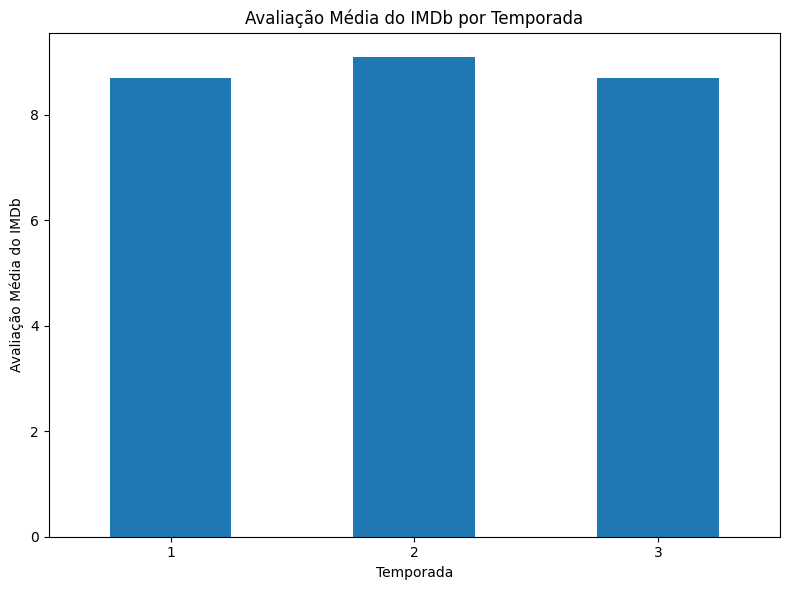

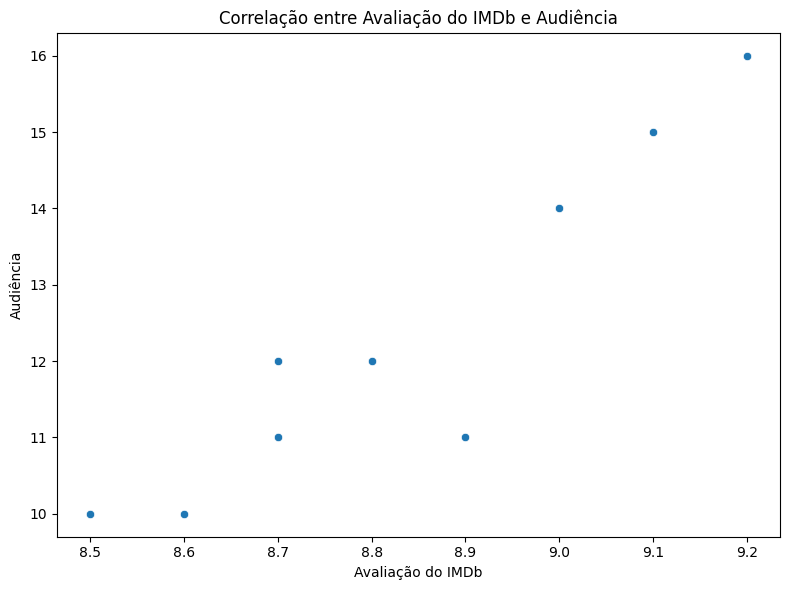

Coeficiente de correlação de Pearson: 0.9293203772845847


In [145]:
analysis_code = response.text.replace("```python\n",'').replace("\n```",'')
exec(analysis_code)

#Ex_06

In [146]:
positivas = [
    "O Homer sempre diz que um dia o trabalho vai valer a pena, e isso me faz acreditar nele.",
    "Marge, você é minha âncora em um mar de confusão, nunca duvide disso!",
    "Até o Bart sabe que a verdadeira força vem de nunca desistir.",
    "Quando a vida parece difícil, sempre há um Springfield esperando por você com um sorriso.",
    "Não há desafio grande o suficiente quando estamos juntos, mesmo que sejamos Simpson."
]
neutro = [
    "Onde está o Sr. Burns agora? Ele sempre tem algo inesperado para dizer.",
    "Só posso esperar que as coisas melhorem, mas, no fundo, sei que é mais complicado do que parece.",
    "Talvez seja hora de mudar de estratégia e tentar algo novo, não é, Lisa?",
    "Homer, você não pode mais ignorar isso, temos que conversar sobre o que realmente está acontecendo.",
    "Eu sempre me pergunto o que teria acontecido se algo diferente tivesse acontecido naquele momento."
]
negativas = [
    "Sabe, não acho que Homer vai mudar, ele já tentou tantas vezes e sempre acaba do mesmo jeito.",
    "Eu realmente pensei que poderíamos ser mais felizes, mas a verdade é que estamos apenas empurrando a vida, sem saber para onde vamos.",
    "A cidade de Springfield pode até ser interessante, mas às vezes eu só quero escapar de tudo isso.",
    "Não importa quantas vezes o Homer diga que vai melhorar, o final sempre é o mesmo.",
    "Eu pensei que tinha mais tempo com você, mas agora vejo que o relógio está sempre contra nós."
]


In [156]:
episode_season = 5
episode_id = 92
df06 = (data[(data.episode_season == episode_season) &
          (data.episode_id == episode_id)].sort_values('number')
)
df06 = df06.dropna(subset='normalized_text')

prompt6 = f"""
Você é um especialista em comunicação humana e marketing, especializado em análise de sentimentos.
Você deve classificar as falas de um desenho animado como negativas, neutras e positivas, conforme definido abaixo:
- positivo: linhas felizes, construtivas, esperançosas, alegres e semelhantes.
- negativo: falas tristes, destrutivas, sem esperança, agressivas e semelhantes.
- neutro: indiferente, objetivo, formal e linhas classificadas vizinhas como positivas ou negativas.

Algumas falas pré-classificadas deste programa estão listadas aqui:

# Positivo:
{ '- '.join(positivas) }


# Negativo:
{ '- '.join(negativas) }


# Neutro:
{ '- '.join(neutro) }

Diante dessas informações, responda em JSON com a classificação dessas outras linhas como positivas, negativas ou neutras.

{ '- '.join(df06.normalized_text.tolist()) }

"""
genai.configure(api_key = GEMINI_API_KEY_PRO)
model = genai.GenerativeModel("gemini-1.5-pro")
response = model.generate_content(prompt6)

1. Quantas chamadas ao LLM foram necessárias?
**R. Apenas uma chamada foi necessaria**


2. Qual é a distribuição de fala por categoria?
**R. O maior numero de classificações foram Negativas**


In [188]:
sentiments = json.loads(response.text.replace("```json\n",'').replace("\n```",''))
sentiments = sentiments['classifications']
sentiments = pd.DataFrame(sentiments)
sentiments.columns = ['normalized_text', 'sentiment']
sentiments.groupby('sentiment').count()

,normalized_text
sentiment,
negative,46
neutral,31
positive,16


<Axes: xlabel='# falas', ylabel='Sentimento'>

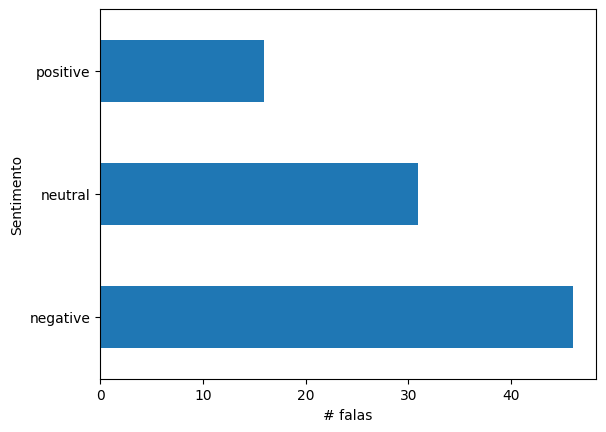

In [186]:
sentiments.sentiment.value_counts().plot.barh(xlabel='# falas', ylabel='Sentimento')

3. Avaliando 5 falas de cada classe, qual é a acurácia do modelo?
**R. Analisando as classificações abaixo, apenas a ultima frase negativa, não classificaria como negativa e sim neutra**

In [194]:
sentiments[sentiments['sentiment'] =='positive'].head(5)

,normalized_text,sentiment
2,woo hoo,positive
36,ahhh aw man thats better,positive
41,cool high-tech security system,positive
42,alright free laserium all the colors of the bo...,positive
43,my cataracts are gone i can see again all the ...,positive


In [195]:
sentiments[sentiments['sentiment'] =='neutral'].head(5)

,normalized_text,sentiment
10,you had a stamp collection,neutral
13,shhh quiet lisa,neutral
14,hey the burglar left his calling card,neutral
16,hidilly ho neighboreenos,neutral
21,hey i thought i had more stuff than this,neutral


In [196]:
sentiments[sentiments['sentiment'] =='negative'].head(5)

,normalized_text,sentiment
0,dad weve been robbed,negative
1,wake up dad wake up there was a burglar and he...,negative
3,and our portable tv,negative
4,and my necklace,negative
5,eh thats no big loss,negative


4. Qual foi a precisão do modelo para cada classe?
**R. Apenas a negativa teve 80% de acerto**

#Ex_07

In [11]:
episode_season = 5
episode_id = 92
df07 = (data[(data.episode_season == episode_season) &
          (data.episode_id == episode_id)].sort_values('number')
)
df07 = df07.dropna(subset='normalized_text') # dropna remove linhas com valores NaN e subset apenas da coluna normalized_text

df07['line'] = (df07['location_normalized_name'].fillna('') + ', ' +
                df07['character_normalized_name'].fillna('') + ' said: ' +
                df07['normalized_text'].fillna('')
)

In [9]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.4 MB/s eta 0:00:00


In [30]:
import tiktoken
import pandas as pd

lista=[]
def estimar_tokens(data):
  encoder = tiktoken.get_encoding("cl100k_base")

  lista = [len(encoder.encode(i)) for i in df07['line']]
  return lista

tokens = estimar_tokens(df07)
print(f'total de Tokens: {len(tokens)}')

total de Tokens: 244


##RESUMO

The episode begins with a thief at Homer's house stealing Liza's saxophone, Bart's TV and Marge's necklace, when everyone was sleeping. By now everyone had noticed the theft and called the police to report it. At the police station they were also receiving several calls about robberies throughout the city. The population set up a meeting to decide on the robberies, Homer Simpsons was assigned to be the leader of the neighborhood patrol along with his friends to find the thief. Where they began to roam the neighborhood streets. Homer Simpsons was on a live TV interview, when he received the call from the thief that he was going to rob the museum, Homer Simpsons said that he was going to protect the museum from the robbery with his friends. Arriving at the museum, Homer Simpsons was distracted by young people drinking beer and ended up drunk on the sidewalk, making it easier for the thief to rob the museum. Everyone in town was angry with Homer, who ended up losing credibility. At home, his father told Homer that he knew who the thief was, a friend of his who lives in the asylum, his name is Molloy. Arriving at the asylum, they caught the thief and made him return everything that was stolen, then he went to jail. In jail, Molloy said he had buried money under a giant tee. Everyone started looking, until they were trapped in a hole after digging so much, it was all a Molloy trick to escape jail.

#Ex_08

In [4]:
episode_season = 5
episode_id = 92
df07 = (data[(data.episode_season == episode_season) &
          (data.episode_id == episode_id)].sort_values('number')
)
df07 = df07.dropna(subset='normalized_text') # dropna remove linhas com valores NaN e subset apenas da coluna normalized_text

df07['line'] = (df07['location_normalized_name'].fillna('') + ', ' +
                df07['character_normalized_name'].fillna('') + ' said: ' +
                df07['normalized_text'].fillna('')
)

In [5]:
# Adicionar o diretório ao Python Path (opcional se o arquivo já estiver no diretório raiz)
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/Prompt/TP 03')

In [10]:
from summarizer import ChunkSummary
import pandas as pd
import json

system_prompt = f"""
You are an editor assistant from the "The Simpsons" show.
You will receive the subtitles from real episodes in the format:
<location>, <character> said: <character line>
"""
user_prompt = f"""
You must create a summary of the episode, pointing out the most
relevant information and key players in the story. Bare in mind
that the summary must describe how the episode started, which key
points are relevant along the story and its gran finale.
"""


episode_summarizer = ChunkSummary(
    model_name = "gemini-1.5-pro",
    apikey = GEMINI_API_KEY_PRO,
    text = df07['line'].tolist(),
    window_size = 100,
    overlap_size = 25,
    system_prompt=system_prompt,
)


episode_summary = episode_summarizer.summarize(user_prompt)

Summarizing text
Summarizing chunk 1 from 4
Summarizing chunk 2 from 4
Summarizing chunk 3 from 4
Summarizing chunk 4 from 4
Interacting


In [11]:
import re

episode_summary1 = episode_summary['summary_final'].replace("```json\n",'').replace("\n```",'')
episode_summary_cleaned = re.sub(r'[\x00-\x1f\x7f]', '', episode_summary1)
summary_final = json.loads(episode_summary_cleaned)


summary_parts = [re.sub(r'[\x00-\x1f\x7f]', '',i.replace("```json\n",'').replace("\n```",'').replace("-",'')) for i in episode_summary['summaries_parts']]
summary_parts_final = {f'part{num+1}': summary_parts[num] for num in range(len(summary_parts))}

In [12]:
summary_final

{'assistant': {'summary': 'A wave of burglaries hits Springfield, with the elusive Cat Burglar leaving his calling card at every scene.  Among the victims are the Simpsons, with Lisa\'s saxophone and Marge\'s necklace stolen.  The inept police force, led by Chief Wiggum, is baffled, failing to connect the dots even when the burglary locations form an arrow pointing to the police station.  Fueled by media hype, Homer forms a neighborhood watch group that quickly devolves into a vigilante posse.  Their heavy-handed tactics cause more harm than good, and they are ultimately humiliated when the Cat Burglar successfully steals the world\'s largest cubic zirconia from the Springfield Museum right under Homer\'s watch.  Disgraced, Homer is later given a clue to the Cat Burglar\'s identity by Grampa.  It turns out to be a seemingly harmless old man named Molloy from the retirement home.  Molloy confesses and returns the stolen goods, including Lisa\'s saxophone.  However, he tricks the town by

In [13]:
summary_parts_final

{'part1': ' {  "summary": "The Simpsons\' home is robbed, along with many other houses in Springfield.  The Cat Burglar, as he\'s known, leaves a calling card and takes valuable items like Lisa\'s saxophone, Marge\'s necklace, and even Ned Flanders\' Shroud of Turin beach towels.  The police, led by the inept Chief Wiggum, are unable to find a pattern to the burglaries, even when it\'s pointed out that the locations form an arrow pointing to the police station.  A media frenzy ensues, fueled by Kent Brockman.  The police attempt to use a tracking dog with the burglar\'s handkerchief, but the dog attacks Chief Wiggum.  Professor Frink suggests a hightech security system that involves houses lifting off their foundations and escaping, which is briefly demonstrated.  Failing to get insurance money due to Homer\'s purchase of magic beans, the Simpsons implement new security measures.  Lisa is devastated by the loss of her saxophone, and Homer promises to get it back.  He buys her a jug as 

##RESPOSTA
Resumo final e partes dos chunk estão retratando corretamente o que de fato aconteceu no episodio. O resumo da LLM foi eficaz em cada resumo apresentado.



#Ex_09

In [15]:
resumo_user = """
The episode begins with a thief at Homer's house stealing Liza's saxophone, Bart's TV and Marge's necklace,
when everyone was sleeping. By now everyone had noticed the theft and called the police to report it.
At the police station they were also receiving several calls about robberies throughout the city.
The population set up a meeting to decide on the robberies, Homer Simpsons was assigned to be the leader of the
neighborhood patrol along with his friends to find the thief. Where they began to roam the neighborhood streets.
Homer Simpsons was on a live TV interview, when he received the call from the thief that he was going to rob the museum,
Homer Simpsons said that he was going to protect the museum from the robbery with his friends. Arriving at the museum,
Homer Simpsons was distracted by young people drinking beer and ended up drunk on the sidewalk, making it easier for
the thief to rob the museum. Everyone in town was angry with Homer, who ended up losing credibility. At home, his
father told Homer that he knew who the thief was, a friend of his who lives in the asylum, his name is Molloy.
Arriving at the asylum, they caught the thief and made him return everything that was stolen, then he went to jail.
In jail, Molloy said he had buried money under a giant tee. Everyone started looking, until they were trapped in a
hole after digging so much, it was all a Molloy trick to escape jail.
"""

In [22]:
!pip install rouge

In [23]:
from rouge import Rouge
rouge_scorer = Rouge()

hypothesis = summary_final['assistant']['summary']
reference = resumo_user

score = rouge_scorer.get_scores(
    hyps=hypothesis,
    refs=reference,
)
print('ROUGE-L-F', score[0]["rouge-l"]["f"])
print('ROUGE-L-R', score[0]["rouge-l"]['r'])
print('ROUGE-L-P', score[0]["rouge-l"]['p'])

ROUGE-L-F 0.2135231266731679
ROUGE-L-R 0.2112676056338028
ROUGE-L-P 0.2158273381294964


As metricas no resultado foram entre 21%, numero baixo, porém  depende das palavras e como foi escrito os dois resumo. Porque o resumo retrata o que de fato aconteceu.

In [31]:
part01_user = """
The episode begins with a thief at Homer's house stealing Liza's saxophone, Bart's TV and Marge's necklace,
when everyone was sleeping. By now everyone had noticed the theft and called the police to report it.
At the police station they were also receiving several calls about robberies throughout the city.
"""

part02_user = """
The population set up a meeting to decide on the robberies, Homer Simpsons was assigned to be the leader of the
neighborhood patrol along with his friends to find the thief. Where they began to roam the neighborhood streets.
Homer Simpsons was on a live TV interview, when he received the call from the thief that he was going to rob the
museum, Homer Simpsons said that he was going to protect the museum from the robbery with his friends.
"""

part03_user = """
Arriving at the museum, Homer Simpsons was distracted by young people drinking beer and ended up drunk on the sidewalk,
making it easier for the thief to rob the museum. Everyone in town was angry with Homer, who ended up losing credibility.
At home, his father told Homer that he knew who the thief was, a friend of his who lives in the asylum, his name is Molloy.
"""

part04_user = """
Arriving at the asylum, they caught the thief and made him return everything that was stolen, then he went to jail.
In jail, Molloy said he had buried money under a giant tee. Everyone started looking, until they were trapped in a
hole after digging so much, it was all a Molloy trick to escape jail.
"""

In [30]:
chunk01 = json.loads(summary_parts_final['part1'])['summary']
chunk02 = json.loads(summary_parts_final['part2'])['summary']
chunk03 = json.loads(summary_parts_final['part3'])['summary']
chunk04 = json.loads(summary_parts_final['part4'])['summary']

In [47]:
from rouge import Rouge

def rouge_scorer(hypothesis,reference):
  rouge_scorer = Rouge()

  score = rouge_scorer.get_scores(
      hyps=hypothesis,
      refs=reference,
  )
  print('ROUGE-L-F', score[0]["rouge-l"]["f"])
  print('ROUGE-L-R', score[0]["rouge-l"]['r'])
  print('ROUGE-L-P', score[0]["rouge-l"]['p'])
  print('\n')

print(f'Primeiro chunk')
rouge_scorer(chunk01,part01_user)

print(f'Segundo chunk')
rouge_scorer(chunk02,part02_user)

print(f'Terceiro chunk')
rouge_scorer(chunk03,part03_user)

print(f'Quarto chunk')
rouge_scorer(chunk04,part04_user,)

print(f"""Todos os comparativos dos chunks mantiveram entre os 20%, mesmo o resumo estando correto.
Como informei no resumo anterior depende das palavras e como foi escrito os dois resumo.
""")

Primeiro chunk
ROUGE-L-F 0.14070351408802817
ROUGE-L-R 0.3111111111111111
ROUGE-L-P 0.09090909090909091


Segundo chunk
ROUGE-L-F 0.16417909987970608
ROUGE-L-R 0.22916666666666666
ROUGE-L-P 0.12790697674418605


Terceiro chunk
ROUGE-L-F 0.1744966396738887
ROUGE-L-R 0.24074074074074073
ROUGE-L-P 0.1368421052631579


Quarto chunk
ROUGE-L-F 0.1758241708392708
ROUGE-L-R 0.16666666666666666
ROUGE-L-P 0.18604651162790697


Todos os comparativos dos chunks mantiveram entre os 20%, mesmo o resumo estando correto.
Como informei no resumo anterior depende das palavras e como foi escrito os dois resumo.

